#### About

> Model interpretability

Model interpretability refers to the ability of a machine learning model to understand and explain itself in human-understandable terms. Explainable models are important in various fields where decision-making needs to be transparent, such as economics, health, and legal applications.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import shap



/home/suraj/anaconda3/envs/dl/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
iris = load_iris()
X = iris.data
y = iris.target


In [3]:
clf = DecisionTreeClassifier(random_state=0, max_depth=3)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=0)

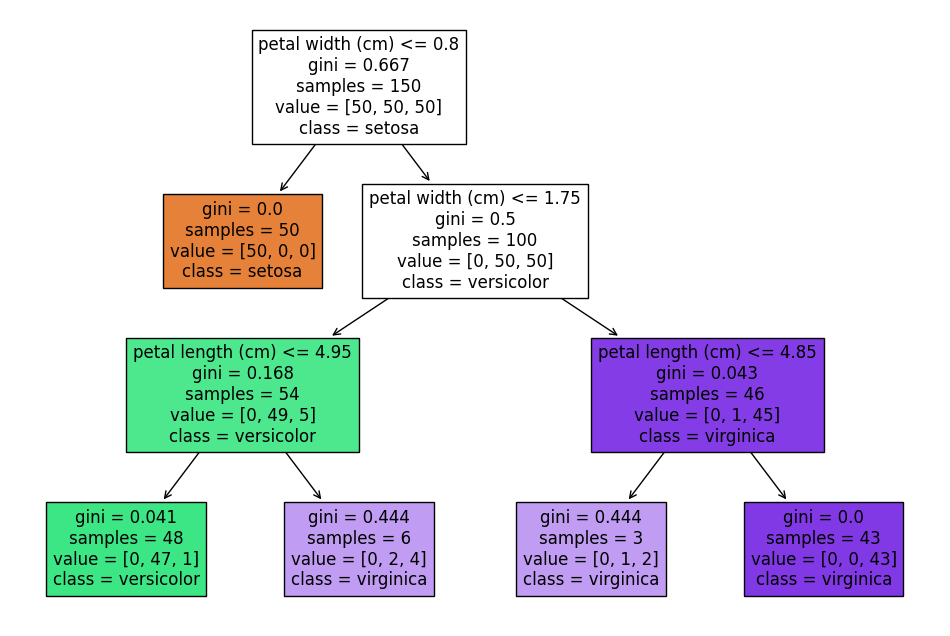

In [4]:
fig = plt.figure(figsize=(12, 8))
_ = tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)


In [5]:
sample = np.array([5.0, 3.5, 1.3, 0.2]).reshape(1, -1)
prediction = clf.predict(sample)
print("Predicted class:", iris.target_names[prediction[0]])

Predicted class: setosa


The resulting tree shows the decision-making process of the model in a human-understandable format, where each node represents a decision based on a feature value, and the leaf nodes represent the predicted class labels. This allows for easy interpretation and explanation of the model's decision-making process.

> Using SHAP, feature importance plots and partial dependence plots



1. Feature Importance Plot: We plot the feature importances, which represent the relative importance of each feature in the model's predictions. This helps us understand which features are most important for the model's decision-making process.

2. Partial Dependence Plot: We use this to create partial dependence plots for each feature. Partial dependence plots show the relationship between a single feature and the model's predicted outcomes while holding other features constant. This helps us understand how individual features influence the model's predictions.

3. SHAP Values: We use this to explain the model's predictions with SHAP values. SHAP values provide a way to attribute the prediction of an individual instance to each feature, showing how much each feature contributes to the prediction.

In [9]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X, y)


RandomForestClassifier(random_state=0)

In [10]:
# Feature Importance Plot
feature_importances = clf.feature_importances_
sorted_idx = np.argsort(feature_importances)

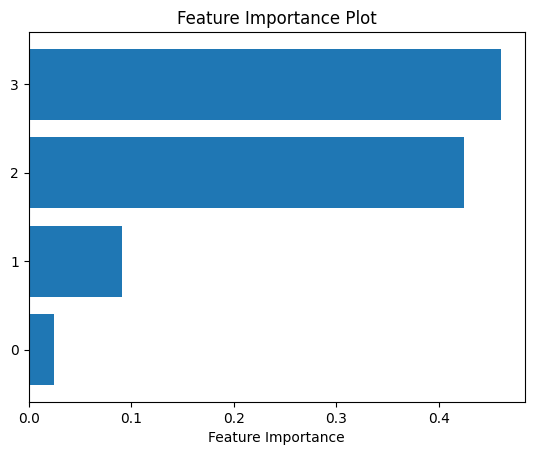

In [12]:
plt.barh(range(X.shape[1]), feature_importances[sorted_idx])
plt.yticks(range(X.shape[1]))
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()